## In this notebook we will compare the Pycaret model and the custom model.

## 1. Importing libraries

First we import all the libraries to load and augment the data. We will also import the libraries that are used to test our model.

In [1]:
from pycaret.classification import predict_model
from pycaret.classification import load_model
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error

## 2. Loading the data

We load the data which will be used to make the model predictions on. We use the test_data.csv file because this way, we can ensure that the model is tested on previously unseen data.

In [ ]:
# Load the test data
test_data = pd.read_csv('.\\Datasets\\test_data.csv')

OSError: [Errno 22] Invalid argument: '.\\Datasets\test_data.csv'

## 3. Preparing the test data

Next up, we define the features which will be given to the model to base their predictions on.

We use this `titanic_features` to split our loaded test_data in an `X_test` dataset, which is given to the model, and an `y_test` dataset, which will be used to compare to the predicted outputs of the model.

In [ ]:
#Prepare the test data
titanic_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',  'cabin']

X_test = test_data[titanic_features]
y_test = test_data['survived']

## 4. Loading the models.

After preparing our test data, we import the Pycaret model and the random forest model.

In [ ]:
#load the Pycaret model
model_path = ".\\Models\\pycaret_model"
pycaret_model = load_model(model_path)

# Load the Random Forest model from the pickle file
with open('.\\Models\\random_forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)


Transformation Pipeline and Model Successfully Loaded


## 5. Creating predictions.

We use the `predict_model()` function to make predictions on the  `X_test` dataset using the Pycaret model.

We usethe `predict()` function to make predictions on the `X_test` dataset using the random forest model.

In [ ]:
# Make predictions on the test data using the PyCaret model
pycaret_predictions = predict_model(pycaret_model, data=X_test)

# Make predictions on the test data using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

## 6. Visualizing the predictions

**6.1 Visualizing the predictions of the Pycaret model**

Before we visualize the predictions of the Pycaret model, we create a new class `outcome` in our dataset. This contains the 1 and 0 values from our prediction. We do this to ensure the values are of the same data type and not a mix of binary and continuous-multioutput targets.

Next up we create a confusion matrix of the predictions. As we can see from the confusion matrix, our model is more biased towards predicting the passengers have died. We can also see that it can most accuratly predict the passengers that died during the crash, followed by the passangers that survived the crash.

Lastly, we display the predictions of the Pycaret model and the accuracy of this model compared to the y_test. We can see the accuracy of the model is roughly 79%

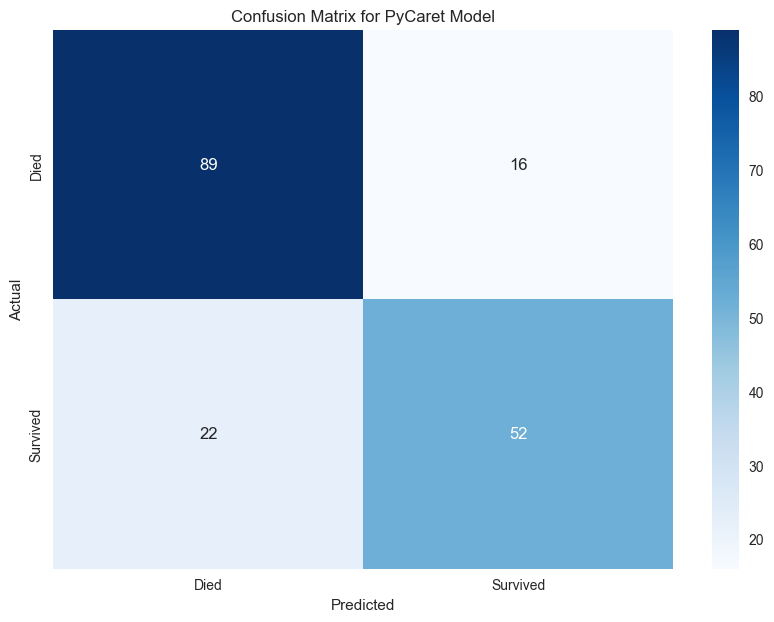

     Actual  Predicted
0         1          0
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
174       0          0
175       0          0
176       1          0
177       1          1
178       1          1

[179 rows x 2 columns]
PyCaret Model Test Accuracy: 78.77%


In [ ]:
# Add a column to indicate if the person survived or drowned
pycaret_predictions['outcome'] = pycaret_predictions['prediction_label'].apply(lambda x: 1 if x == 1 else 0)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pycaret_predictions['outcome'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for PyCaret Model')
plt.show()

# Calculate accuracy for the PyCaret model
pycaret_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pycaret_predictions['outcome']})
print(pycaret_comparison)
pycaret_test_accuracy = accuracy_score(y_test, pycaret_predictions['outcome'])
print(f"PyCaret Model Test Accuracy: {pycaret_test_accuracy*100:.2f}%")

**6.1 Visualizing the predictions of the random forest model**

Before we visualize the predictions of the Pycaret model, we define a new variable called `y_pred_rf_binary`. This variable contains a 1 if the model is more than 80% sure that the passenger survived, else it contains a 0, indicating the passenger died.

Next up we create a `confusion matrix` of the predictions. As we can see from the confusion matrix, the random forest model also is more biased towards predicting the passengers have died. We can also see that it can most accuratly predict the passengers that died during the crash, followed by the passangers that survived the crash. It also has a high value for predicting survivors as dead passengers.

Lastly, we display the `MSE` (mean squared error) of the random forest model and the `accuracy` of this model compared to the y_test. The `MSE` or mean squared error indicates the average squared difference between the actual values andn the predicted values. This means it measures how close the predictions are compared to the actual values. A lower MSE means a better fit. The `MSE` of our model is 0.14, which indicates a good fit of our random forest model. We can see the `accuracy` of the model is roughly 79%.

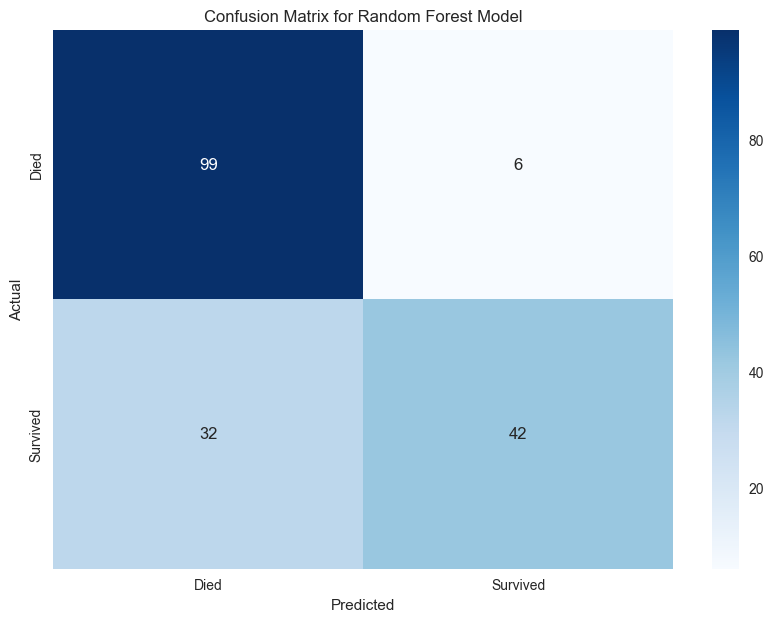

Random Forest Model MSE: 0.1430155210802352
PyCaret Model Test Accuracy: 78.77%


In [ ]:
# Convert predictions to binary outcomes
y_pred_rf_binary = [1 if pred >= 0.8 else 0 for pred in y_pred_rf]

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_binary)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Model MSE:", rf_mse)

# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf_binary)
print(f"PyCaret Model Test Accuracy: {rf_accuracy*100:.2f}%")

## 7. Conclusion

Both the PyCaret model and the Random Forest model achieved an accuracy of approximately 79% on the test dataset. The confusion matrices for both models indicate a bias towards predicting that passengers did not survive. The Random Forest model had a Mean Squared Error (MSE) of 0.14, indicating a good fit.